# Generate SED

Example for generating the rest-frame spectrum for a parametric galaxy including
photometry. This example will:

- build a parametric galaxy (see make_sfzh)
- calculate spectral luminosity density

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh
from synthesizer.galaxy.parametric import ParametricGalaxy as Galaxy
from synthesizer.plt import single, single_histxy, mlabel
from unyt import yr, Myr
from astropy.cosmology import Planck18 as cosmo

In [2]:
grid_dir = '../../../tests/test_grid'
grid_name = 'test_grid'

grid = Grid(grid_name, grid_dir=grid_dir)

Define the parameters of the star formation and metal enrichment histories

In [3]:
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 1E8

Define the functional form of the star formation and metal enrichment histories

In [4]:
sfh = SFH.Constant(sfh_p)  # constant star formation
print(sfh)  # print sfh summary

Zh = ZH.deltaConstant(Z_p)  # constant metallicity

----------
SUMMARY OF PARAMETERISED STAR FORMATION HISTORY
<class 'synthesizer.parametric.sfzh.SFH.Constant'>
duration: 10 Myr
median age: 5.00 Myr
mean age: 5.00 Myr
----------



Get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).

In [5]:
sfzh = generate_sfzh(grid.log10ages, grid.metallicities, sfh, Zh, stellar_mass=stellar_mass)

Create a galaxy object

In [6]:
galaxy = Galaxy(sfzh)

Generate pure stellar spectra alone

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

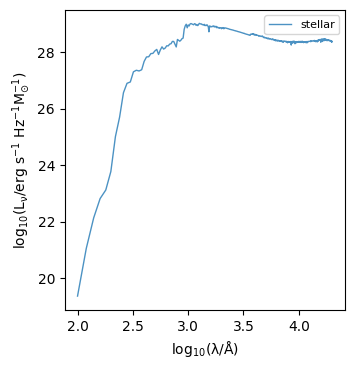

In [7]:
galaxy.get_stellar_spectra(grid)
galaxy.plot_spectra()

Generate intrinsic spectra (which includes reprocessing by gas)

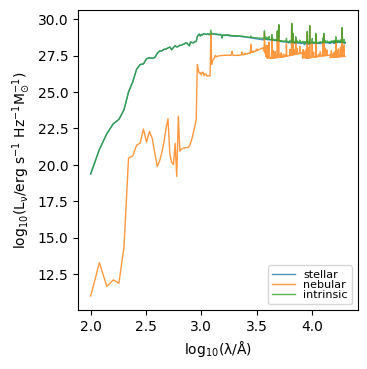

In [8]:
galaxy.get_intrinsic_spectra(grid, fesc = 0.5)
fig, ax = galaxy.plot_spectra()

Simple dust and gas screen

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

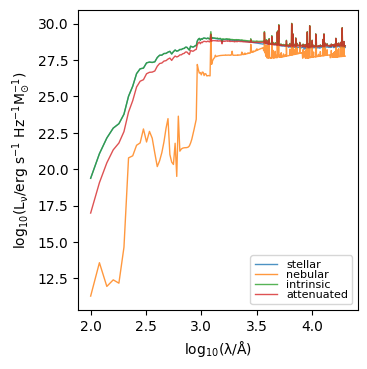

In [9]:
galaxy.get_screen_spectra(grid, tauV = 0.1) # fesc = 0.5)
galaxy.plot_spectra()

Pacman model

/Users/willroper/Documents/University/Synthesizer/synthesizer-env/lib/python3.10/site-packages/unyt/array.py:1758: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

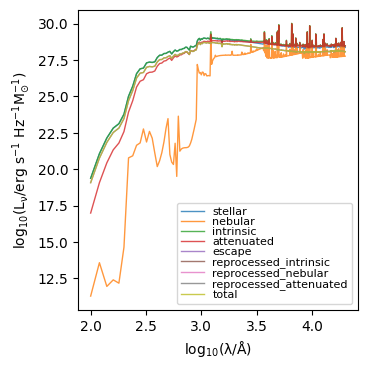

In [10]:
galaxy.get_pacman_spectra(grid, tauV = 0.1, fesc = 0.5)
galaxy.plot_spectra()

Pacman model (no Lyman-alpha escapes and no dust)

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

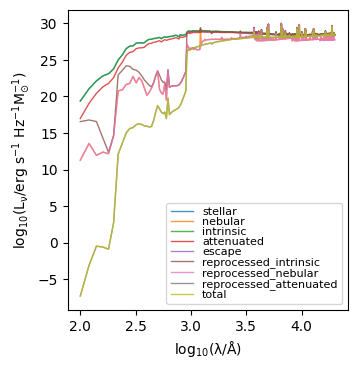

In [11]:
galaxy.get_pacman_spectra(grid, fesc = 0.0, fesc_LyA = 0.0)
galaxy.plot_spectra()

Pacman model (complex)

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

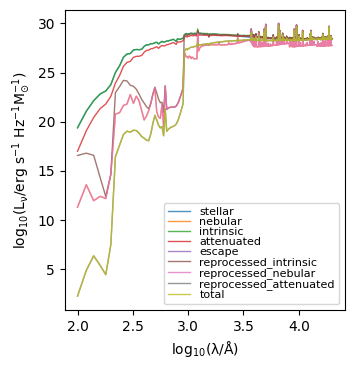

In [12]:
galaxy.get_pacman_spectra(grid, fesc=0.0, fesc_LyA=0.5, tauV=0.6)
galaxy.plot_spectra()

In [13]:
# galaxy.get_pacman_spectra(grid, tauV = 0.1, fesc = 0.5)
# galaxy.plot_spectra()

Print galaxy summary

In [14]:
print(galaxy)

sed = galaxy.spectra['total']
print(sed)

----------
SUMMARY OF PARAMETRIC GALAXY
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⡀⠒⠒⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⢀⣤⣶⡾⠿⠿⠿⠿⣿⣿⣶⣦⣄⠙⠷⣤⡀⠀⠀⠀⠀
        ⠀⠀⠀⣠⡾⠛⠉⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⣿⣷⣄⠘⢿⡄⠀⠀⠀
        ⠀⢀⡾⠋⠀⠀⠀⠀⠀⠀⠀⠀⠐⠂⠠⢄⡀⠈⢿⣿⣧⠈⢿⡄⠀⠀
        ⢀⠏⠀⠀⠀⢀⠄⣀⣴⣾⠿⠛⠛⠛⠷⣦⡙⢦⠀⢻⣿⡆⠘⡇⠀⠀
        ---+-+-+-+-+-+-+-+-+-+-+-+---
           |S|Y|N|T|H|E|S|I|Z|E|R|
        ---+-+-+-+-+-+-+-+-+-+-+-+---
        ⠀⠀⢸⡇⠸⣿⣷⠀⢳⡈⢿⣦⣀⣀⣀⣠⣴⣾⠟⠁⠀⠀⠀⠀⢀⡎
        ⠀⠀⠘⣷⠀⢻⣿⣧⠀⠙⠢⠌⢉⣛⠛⠋⠉⠀⠀⠀⠀⠀⠀⣠⠎⠀
        ⠀⠀⠀⠹⣧⡀⠻⣿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⡾⠃⠀⠀
        ⠀⠀⠀⠀⠈⠻⣤⡈⠻⢿⣿⣷⣦⣤⣤⣤⣤⣤⣴⡾⠛⠉⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠈⠙⠶⢤⣈⣉⠛⠛⠛⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
<class 'synthesizer.galaxy.parametric.ParametricGalaxy'>
log10(stellar mass formed/Msol): 8.0
available SEDs: ['stellar', 'nebular', 'intrinsic', 'attenuated', 'escape', 'reprocessed_intrinsic', 'reprocessed_nebular', 'reprocessed_attenuated', 'total']
available lines: []
available images: []
----------

----------
SUMMARY OF SED 
Number of wavelength points: 995 
----------


Generate broadband photometry

In [15]:
tophats = {'U': {'lam_eff': 3650, 'lam_fwhm': 660},
           'V': {'lam_eff': 5510, 'lam_fwhm': 880},
           'J': {'lam_eff': 12200, 'lam_fwhm': 2130}}
fc = FilterCollection(tophat_dict=tophats, new_lam=sed.lam.value)

bb_lnu = sed.get_broadband_luminosities(fc)
print(bb_lnu)

{'U': unyt_quantity(2.69159639e+28, 'erg/(Hz*s)'), 'V': unyt_quantity(1.89346927e+28, 'erg/(Hz*s)'), 'J': unyt_quantity(2.58993177e+28, 'erg/(Hz*s)')}
